In [1]:
# Data files are too large to be uploaded
%matplotlib notebook
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from loadfits import LoadFits
from scipy.interpolate import interp1d

datadir = 'CRdata/'
H0=69.6

# Energys: 50, 60, 70, 80,90,100 EeV
Energy = 100 #EeV


# Names: GALAXY, BL LAC, AGN UNCLASSIFIED, LINER, NEL GALAXY, QSO TYPE I, RADIO GALAXY, UNIDENTIFIED
Type='BL LAC'



energies,mfps = np.load(datadir+'mfp.npy').T
GZK = mfps[energies==Energy]

# Calculated by CRPROPA on VISPA
lats,lons,lats_out,lons_out,sep = np.load(datadir+'result-%d.npy'%Energy).T

lats = np.pi/2-lats
lats_out = np.pi/2-lats_out

AGN = LoadFits(datadir+Type+'.fits')

z_agn = AGN['redshift']
dis_agn = z_agn*3e5/H0 #Mpc
AGN=AGN[dis_agn<GZK*1.5]
ra_agn = AGN['ra']
dec_agn = AGN['dec']
z_agn = AGN['redshift']
dis_agn = z_agn*3e5/H0 #Mpc

cat_out = SkyCoord(lons_out*u.rad,lats_out*u.rad,frame='galactic')
agn_coord = SkyCoord(ra=ra_agn*u.degree,dec=dec_agn*u.degree).galactic
idx,d2d,d3d=agn_coord.match_to_catalog_sky(cat_out)
lon_i = lons[idx]
lat_i = lats[idx]
lon_s = agn_coord.l.rad
lat_s = agn_coord.b.rad

lon_s[lon_s>np.pi]-=2*np.pi
lon_i[lon_i>np.pi]-=2*np.pi

<IPython.core.display.Javascript object>


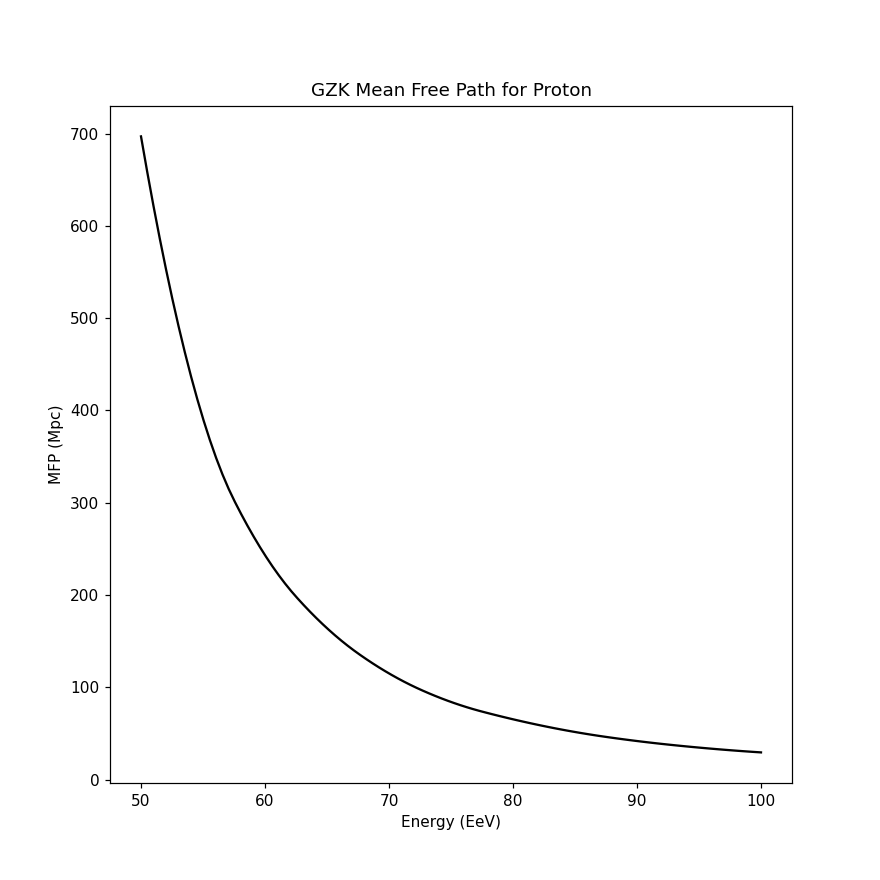

In [2]:
f = interp1d(energies, mfps,kind='quadratic')
x = np.linspace(50,100,100)
y = f(x)

fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111)
ax2.plot(x,y,color='k')
#ax2.scatter(energies,mfps)
ax2.set_title('GZK Mean Free Path for Proton')
ax2.set_ylabel('MFP (Mpc)')
ax2.set_xlabel('Energy (EeV)')
plt.show()

<IPython.core.display.Javascript object>


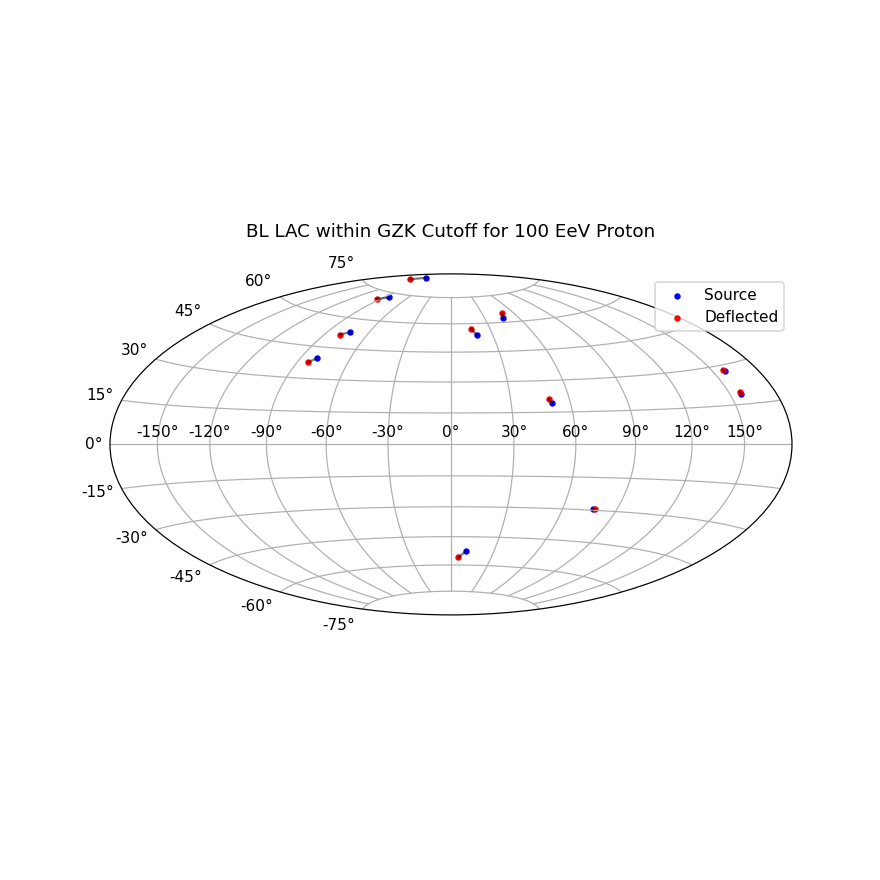

In [3]:
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111, projection='hammer')
ax1.scatter(-lon_s,lat_s,color='b',label='Source',s=10,marker='o')
ax1.scatter(-lon_i,lat_i,color='r',label='Deflected',s=10,marker='o')

for i in range(len(lon_s)):
    if abs(lon_s[i]-lon_i[i])>np.pi:
        if lon_s[i]<lon_i[i]:
            ax1.plot([-lon_s[i],2*np.pi-lon_i[i]],[lat_s[i],lat_i[i]],color='k',alpha=0.5)
            ax1.plot([-lon_s[i]-2*np.pi,-lon_i[i]],[lat_s[i],lat_i[i]],color='k',alpha=0.5)
        else:
            ax1.plot([-lon_s[i],-2*np.pi-lon_i[i]],[lat_s[i],lat_i[i]],color='k',alpha=0.5)
            ax1.plot([-lon_s[i]+2*np.pi,-lon_i[i]],[lat_s[i],lat_i[i]],color='k',alpha=0.5)
    else:
        ax1.plot([-lon_s[i],-lon_i[i]],[lat_s[i],lat_i[i]],color='k',alpha=0.5)

plt.legend()
plt.title(Type+" within GZK Cutoff for %d EeV Proton"%Energy,y=1.08)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


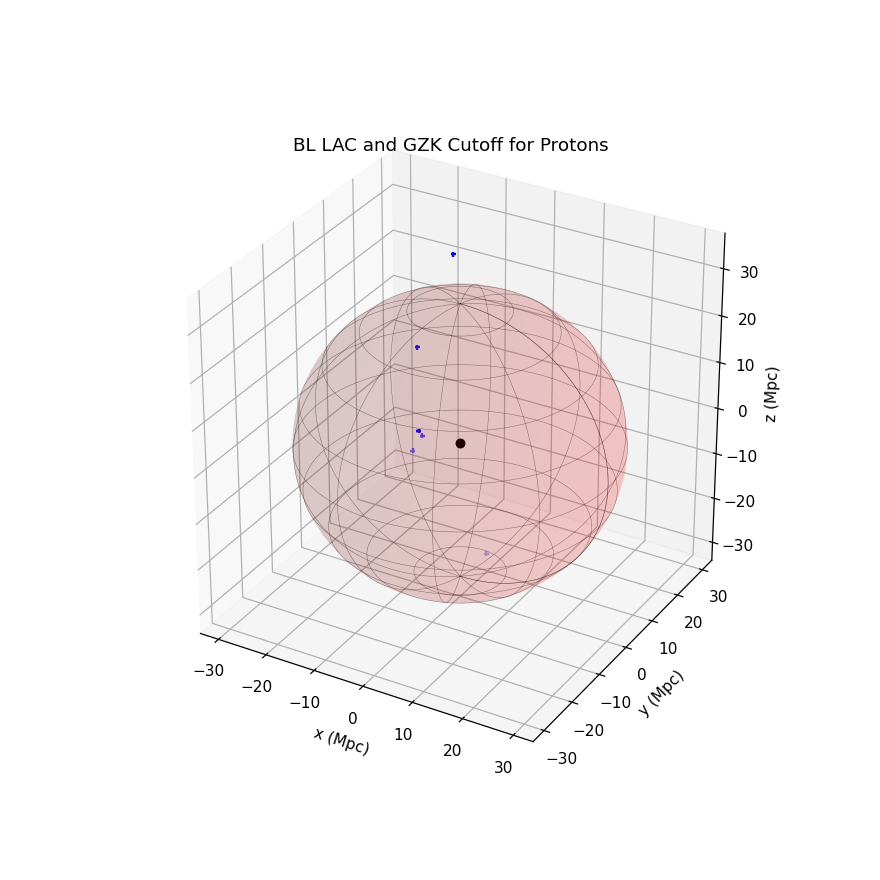

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')#fig.add_subplot(111, projection='3d')
xs = dis_agn*np.cos(lat_s)*np.cos(lon_s)-8.5
ys = dis_agn*np.cos(lat_s)*np.sin(lon_s)
zs = dis_agn*np.sin(lat_s)

xi = dis_agn*np.cos(lat_i)*np.cos(lon_i)-8.5
yi = dis_agn*np.cos(lat_i)*np.sin(lon_i)
zi = dis_agn*np.sin(lat_i)
ax.scatter(xs,ys,zs,color='b',label='Source',s=10,marker='+')
#ax.scatter(xi,yi,zi,color='r',label='Deflected',s=5,marker='x')
ax.scatter(-0.0085,0,0,color='k',label='Earth',s=30,marker='o')
max_range = max(dis_agn)
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten()
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten()
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten()
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
   ax.plot([xb], [yb], [zb], 'w')
ax.set_xlabel('x (Mpc)')
ax.set_ylabel('y (Mpc)')
ax.set_zlabel('z (Mpc)')

 

r = GZK
u, v = np.meshgrid(np.linspace(0, 2*np.pi, 100), np.linspace(0, np.pi, 100))
x = r * np.cos(u) * np.sin(v)
y = r * np.sin(u) * np.sin(v)
z = r * np.cos(v)
ax.plot_surface(x, y, z, rstride=2, cstride=2, color='r', alpha=0.1, lw=0)
ax.plot_wireframe(x, y, z, rstride=10, cstride=10, color='k', alpha=0.5, lw=0.3)
ax.text(100,100,100,'Test')


plt.title(Type+' and GZK Cutoff for Protons')
plt.show()